In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import sys

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Read the dataset
data = pd.read_csv('Air pollution Dataset.csv')

In [4]:
print('dataframe shape:', data.shape) #dataframe shape: (43824, 13)

dataframe shape: (43824, 13)


In [5]:
#shows first five rows of the DataFrame
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
#check if there is any NaN Value
data['pm2.5'].isnull().sum()

2067

In [8]:
#Removing null values
data.dropna(subset=['pm2.5'], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [9]:
data['datetime'] = data[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
data.sort_values('datetime', ascending=True, inplace=True)

In [10]:
data['pm2.5'].isnull().sum()

0

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot of PM 2.5')

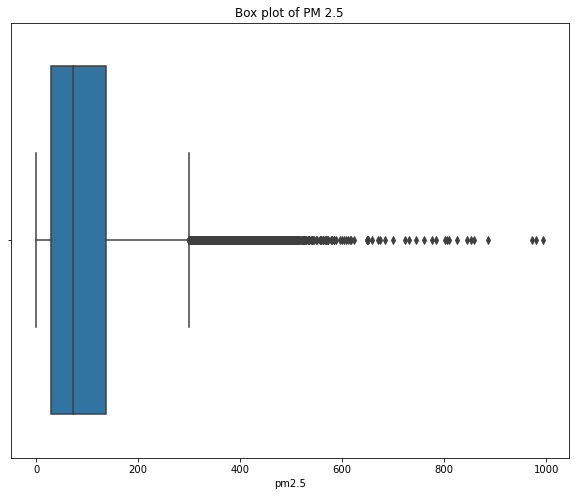

In [11]:
#box plot to visualize distribution of PM2.5
plt.figure(figsize=(10,8))
g = sns.boxplot(data['pm2.5'])
g.set_title('Box plot of PM 2.5')

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'pm2.5 readings')

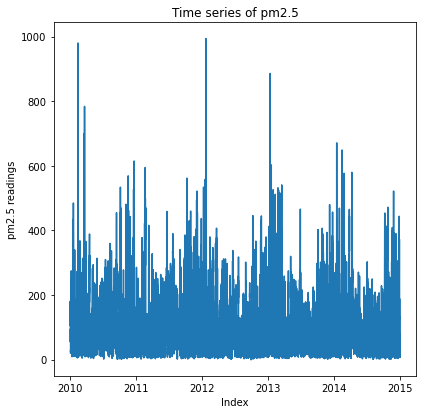

In [16]:
plt.figure(figsize=(6.5, 6.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'pm2.5 readings')

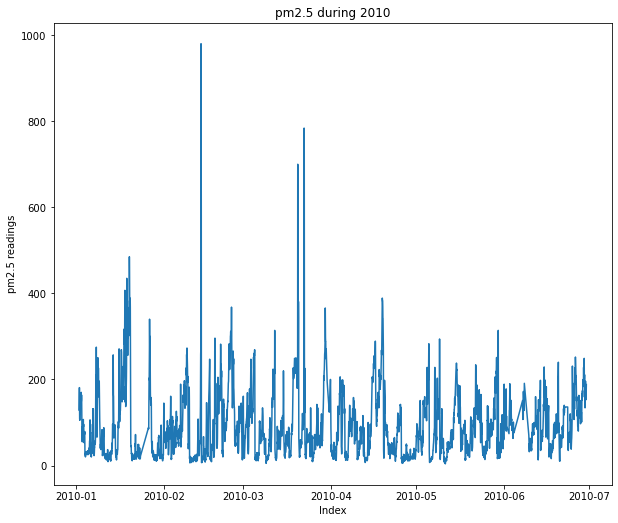

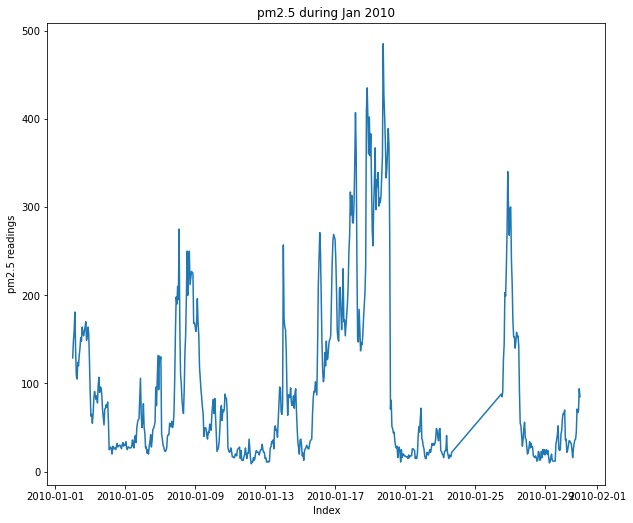

In [17]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=6,day=30)])
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=1,day=31)],)
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_pm2.5'] = scaler.fit_transform(np.array(data['pm2.5']).reshape(-1, 1))

In [19]:
data.sample(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
30974,32915,2013,10,3,10,95.0,7,17.0,1021.0,SE,3.13,0,0,2013-10-03 10:00:00,0.095573
2209,2339,2010,4,8,10,107.0,1,13.0,1010.0,SE,129.63,0,0,2010-04-08 10:00:00,0.107646
40684,42712,2014,11,15,15,206.0,-5,8.0,1026.0,SE,0.89,0,0,2014-11-15 15:00:00,0.207243
35950,37933,2014,4,30,12,135.0,10,26.0,1009.0,cv,3.13,0,0,2014-04-30 12:00:00,0.135815
3922,4214,2010,6,25,13,136.0,14,31.0,1007.0,cv,5.37,0,0,2010-06-25 13:00:00,0.136821
9632,10383,2011,3,9,14,16.0,-17,12.0,1026.0,NW,25.48,0,0,2011-03-09 14:00:00,0.016097
15885,17283,2011,12,22,2,14.0,-17,-4.0,1034.0,NW,9.39,0,0,2011-12-22 02:00:00,0.014085
37684,39691,2014,7,12,18,12.0,11,33.0,1000.0,SE,15.20,0,0,2014-07-12 18:00:00,0.012072
39333,41356,2014,9,20,3,142.0,17,18.0,1009.0,cv,1.78,0,0,2014-09-20 03:00:00,0.142857
4082,4374,2010,7,2,5,17.0,18,20.0,1000.0,NW,28.16,0,0,2010-07-02 05:00:00,0.017103


In [20]:
#splitting the dataset into train and test. 
#Dataset contains data from Jan 1st, 2010 to Dec 31st, 2014. 
#The first fours years - 2010 to 2013 is used as train and 2014 is kept for test.

split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
data_train = data.loc[data['datetime']<split_date]
data_test = data.loc[data['datetime']>=split_date]
print('Shape of train:', data_train.shape)
print('Shape of test:', data_test.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [21]:
#First five rows of train
data_train.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [60]:
#First five rows of validation
data_test.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [22]:
#Reset the indices of the validation set
data_test.reset_index(drop=True, inplace=True)

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Scaled pm2.5 readings')

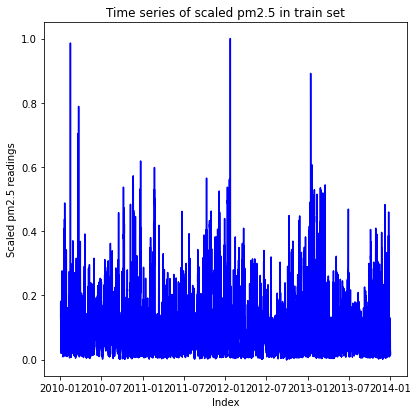

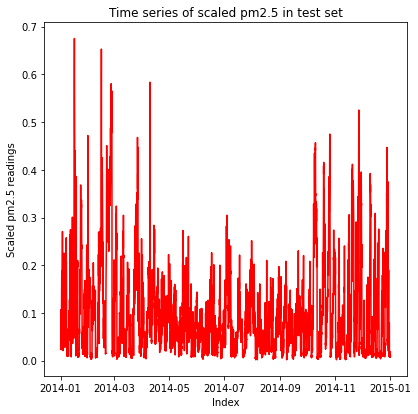

In [23]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(6.5, 6.5))
g = sns.lineplot(data_train['datetime'] , data_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(6.5, 6.5))
g = sns.lineplot(data_test['datetime'] , data_test['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

In [24]:
def makeXy(time_series, nb_timesteps):
    """
    Input: 
           time_series: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, time_series.shape[0]):
        X.append(list(time_series.loc[i-nb_timesteps:i-1]))
        y.append(time_series.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [25]:
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [26]:
X_train, y_train = makeXy(data_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [27]:
X_test, y_test = makeXy(data_test['scaled_pm2.5'], 7)
print('Shape of test arrays:', X_test.shape, y_test.shape)

Shape of test arrays: (8654, 7) (8654,)


In [28]:
#X_train and X_test are reshaped to 3D arrays
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_test.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [29]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [30]:
input_layer = Input(shape=(7,), dtype='float32')

In [31]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

In [32]:
dropout_layer = Dropout(0.2)(dense3)

In [33]:
#Finally output layer
output_layer = Dense(1, activation='linear')(dropout_layer)

In [36]:
time_series_model = Model(inputs=input_layer, outputs=output_layer)
time_series_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
time_series_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________

In [37]:
time_series_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, validation_data=(X_test, y_test),
             shuffle=True)

ValueError: Error when checking input: expected input_1 to have 2 dimensions, but got array with shape (33089, 7, 1)

In [37]:
predictions = time_series_model.predict(X_test)
predictions_pm25 = scaler.inverse_transform(predictions)
predictions_pm25 = np.squeeze(predictions_pm25)

In [38]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(data_test['pm2.5'].loc[7:], predictions_pm25)
print('MAE for the test set:', round(mae, 4))

MAE for the test set: 11.777


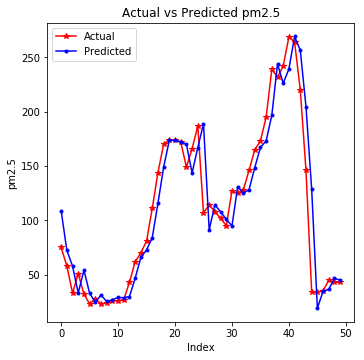

In [45]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), data_test['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), predictions_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('plot_MLP.jpeg', format='png', dpi=1000)